In [76]:
from ucimlrepo import fetch_ucirepo 

# faz o fetch do dataset 
dataset = fetch_ucirepo(id=186)

# dados (pandas dataframes) 
X = dataset.data.features 
y = dataset.data.targets 
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [78]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


In [108]:
y['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [79]:
X.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [80]:
atributos_object = X.dtypes == 'object'
print(atributos_object)

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
dtype: bool


In [81]:
from sklearn.preprocessing import MinMaxScaler

for atributo in X.columns:
    X[atributo] = MinMaxScaler().fit_transform(X[[atributo]])
X

/tmp/ipykernel_6438/1255444400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[atributo] = MinMaxScaler().fit_transform(X[[atributo]])
/tmp/ipykernel_6438/1255444400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[atributo] = MinMaxScaler().fit_transform(X[[atributo]])
/tmp/ipykernel_6438/1255444400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899
...,...,...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768
6493,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884
6494,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899
6495,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652


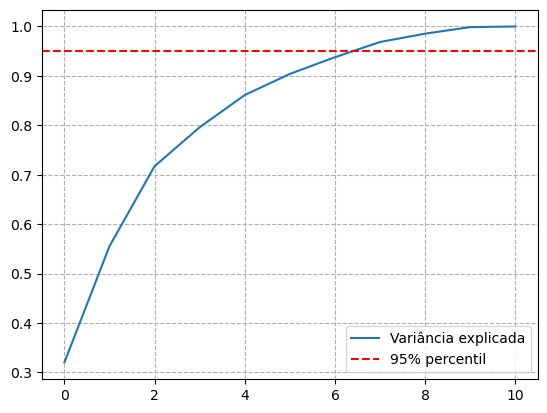

In [82]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='Variância explicada')
plt.axhline(0.95, color='red', linestyle='--', label='95% percentil')
plt.grid(True, linestyle='--')
plt.legend()

In [83]:
pca   = PCA(n_components=7)
X_pca = pca.fit_transform(X)

X_pca

array([[ 0.08853358, -0.39014333,  0.22240215, ..., -0.00454969,
        -0.041131  , -0.00667397],
       [ 0.05542598, -0.35022475,  0.05771987, ...,  0.16398125,
         0.07917428, -0.02763423],
       [ 0.0703452 , -0.33625361,  0.06429745, ...,  0.08481845,
         0.04846001, -0.01422474],
       ...,
       [-0.1456587 ,  0.0131764 , -0.03587177, ..., -0.13966644,
         0.0906448 , -0.05548459],
       [ 0.31788425,  0.2371859 ,  0.09602751, ..., -0.01952663,
        -0.03540394, -0.02927146],
       [ 0.18478845,  0.19062128,  0.02854532, ..., -0.1085098 ,
        -0.05769645, -0.0497247 ]])

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=99)
# X_train.shape
y_train.shape

(5197, 1)

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


classificadores = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'DT' : DecisionTreeClassifier(),
    'RF' : RandomForestClassifier(),
    'LR' : LogisticRegression(),
    'NB' : GaussianNB()
}

In [100]:
import time
acuracia_treino = {}
tempo_treino    = {}

for clf in classificadores:
    start_time = time.process_time()
    classificadores[clf].fit(X_train, y_train.to_numpy().flatten())
    acuracia_treino[clf] = classificadores[clf].score(X_train, y_train.to_numpy().flatten())
    tempo_treino[clf]    = time.process_time() - start_time

Text(0.5, 1.0, 'Tempo Treinamento')

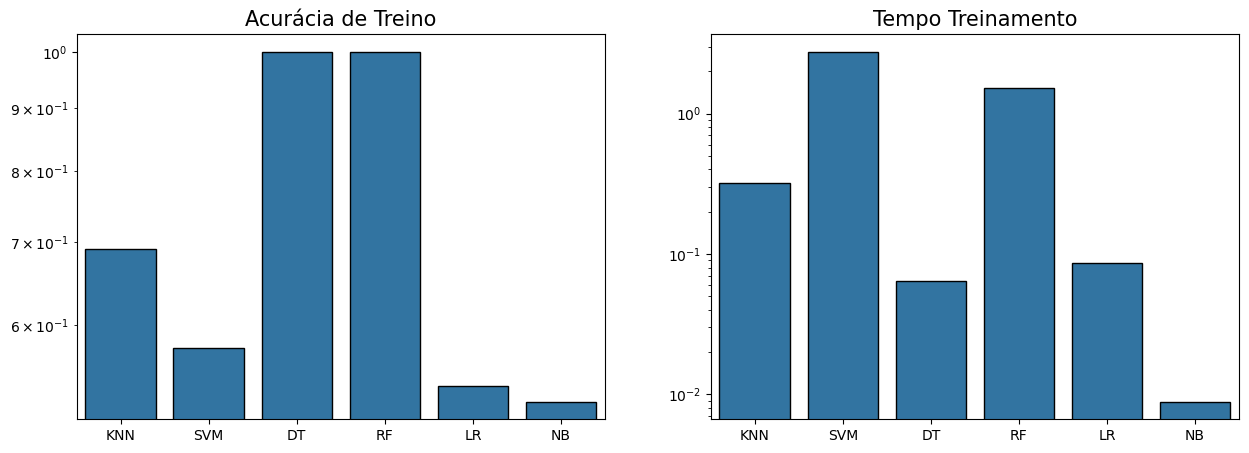

In [116]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=list(acuracia_treino.keys()), y=list(acuracia_treino.values()), ax=ax[0], ec='k')
sns.barplot(x=list(tempo_treino.keys()), y=list(tempo_treino.values()), ax=ax[1], ec='k')

ax[0].set_yscale('log')
ax[0].set_title('Acurácia de Treino', size=15)

ax[1].set_yscale('log')
ax[1].set_title('Tempo Treinamento', size=15)

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

metricas = {}

for clf in classificadores:
    metricas[clf] = {}
    classificadores[clf].fit(X_train, y_train.to_numpy().flatten())
    predictions   = classificadores[clf].predict(X_test)
    metricas[clf]['accuracy']  = accuracy_score(y_test.to_numpy().flatten(), predictions)
    metricas[clf]['precision'] = precision_score(y_test.to_numpy().flatten(), predictions, average='micro')
    metricas[clf]['recall']    = recall_score(y_test.to_numpy().flatten(), predictions, average='micro')
    metricas[clf]['f1']        = f1_score(y_test.to_numpy().flatten(), predictions, average='micro')

resultado = pd.DataFrame(metricas)

In [110]:
list(classificadores[clf].classes_)

[3, 4, 5, 6, 7, 8, 9]

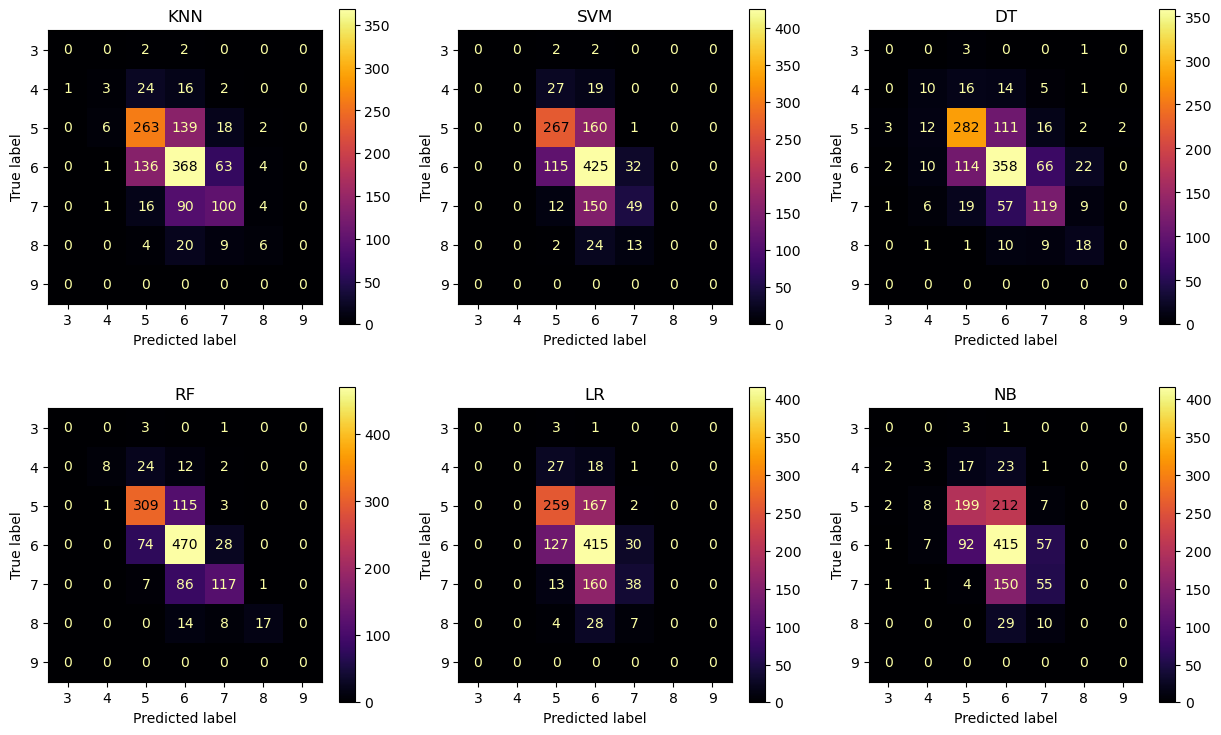

In [122]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
ax      = ax.flatten()

for idx, clf in enumerate(classificadores):
    predictions = classificadores[clf].predict(X_test)
    cm = confusion_matrix(y_test.to_numpy().flatten(), predictions, labels=classificadores[clf].classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classificadores[clf].classes_, )
    disp.plot(ax=ax[idx], cmap='inferno') 
    ax[idx].set_title(clf)

Text(0, 0.5, 'Acurácia média')

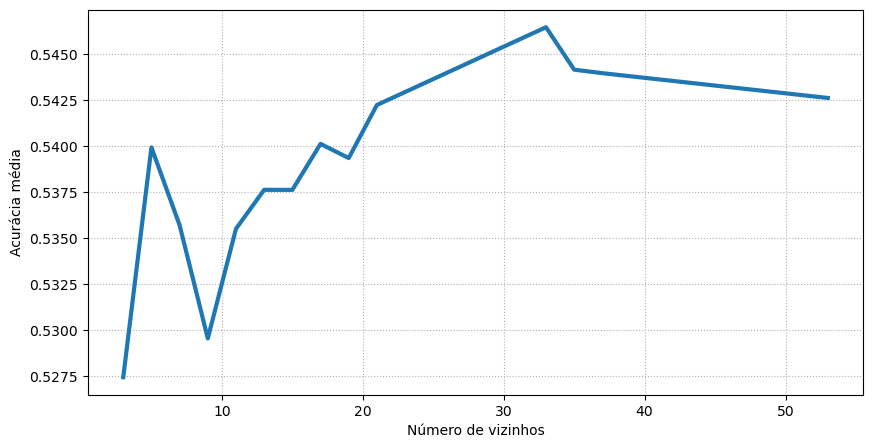

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

ks   = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 37, 33, 35, 53]
accs = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.to_numpy().flatten())
    scores = cross_val_score(knn, X_train, y_train.to_numpy().flatten(), cv=5)
    accs.append(scores.mean())

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=ks, y=accs, linewidth=3, ax=ax)
plt.grid(True, linestyle=':')
plt.xlabel('Número de vizinhos')
plt.ylabel('Acurácia média')

In [92]:
from sklearn.decomposition import PCA
import seaborn as sns

pca       = PCA(n_components=2)
dados_pca = pca.fit_transform(X)

x_treino, x_teste, y_treino, y_teste = train_test_split(dados_pca, y, test_size=0.2, random_state=99, shuffle=True)

/usr/local/lib64/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/c-specp25-2/ra290192/.local/lib/python3.13/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib64/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/c-specp25-2/ra290192/.local/lib/python3.13/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black

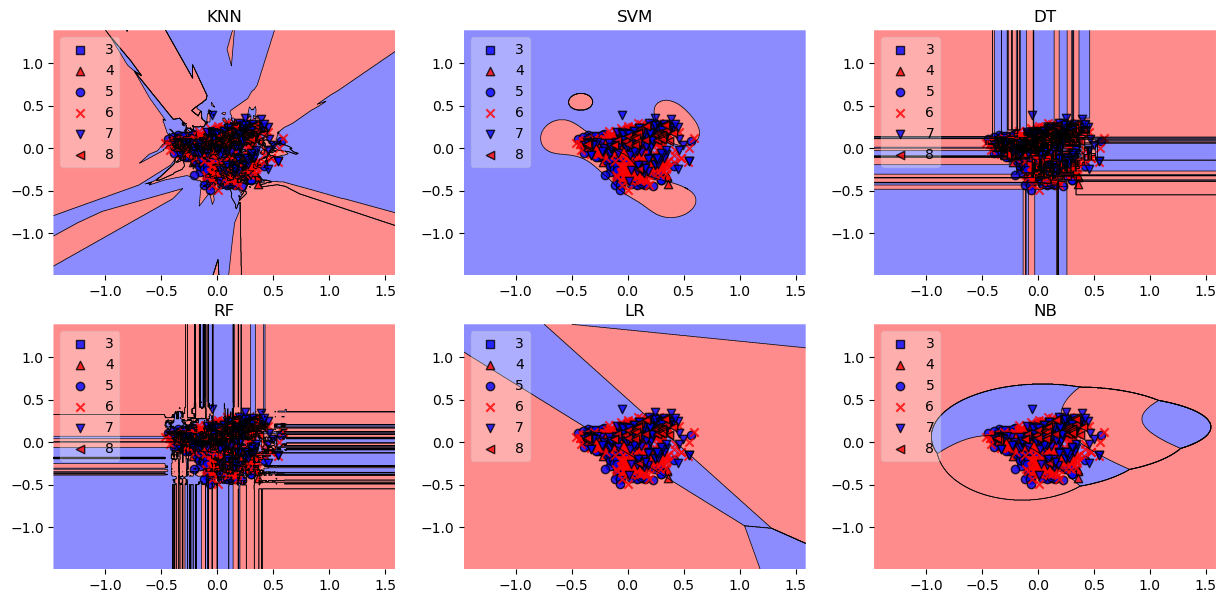

In [93]:
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
ax      = ax.flatten()

for idx, clf in enumerate(classificadores):
    classificadores[clf].fit(x_treino, y_treino)
    plot_decision_regions(x_teste, y_teste.to_numpy().flatten(), clf=classificadores[clf], 
                          legend=2, ax=ax[idx], colors='blue,red')
    ax[idx].set_title(clf)